### LINEAR REGRESSION USING SINGLE FEATURE 
### x = sqft_living and y = price ,using refined data of 4994 rows and 14 columns

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [226]:
df1 = pd.read_csv("housingnew.csv")

In [227]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,47.5208,-122.393,1360
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,47.6168,-122.045,1800


In [228]:
df1.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
dtype: int64

In [229]:
x = df1["sqft_living"]

In [230]:
x.describe()

count     4994.000000
mean      2060.901882
std        923.890579
min        380.000000
25%       1410.000000
50%       1890.000000
75%       2500.000000
max      10040.000000
Name: sqft_living, dtype: float64

In [231]:
x.shape

(4994,)

In [232]:
y = df1["price"]

In [233]:
y.shape

(4994,)

In [247]:
p = np.array(x)
p.shape

(4994,)

In [248]:
q = np.array(y)
q.shape

(4994,)

In [236]:
x_train, x_test, y_train, y_test = train_test_split(
    p, q, test_size=0.2,random_state=7)

In [237]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [238]:
linreg = LinearRegression()

In [239]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
print (linreg.intercept_)
print (linreg.coef_)

[-59662.95405763]
[[291.65736958]]


In [241]:
linreg.predict([[1000]])

array([[231994.41552432]])

In [242]:
mse = mean_squared_error(y_test, linreg.predict(x_test))

In [243]:
np.sqrt(mse)

273979.3099238095

In [244]:
linreg.score(x_test,y_test)

0.5130317926181169

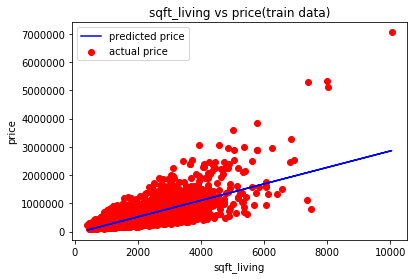

In [245]:
plt.scatter(x_train, y_train, color = 'red',label = "actual price")
plt.plot(x_train, linreg.predict(x_train), color = 'blue' ,label = "predicted price")
plt.legend(loc='upper left')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("sqft_living vs price(train data)")
plt.show()

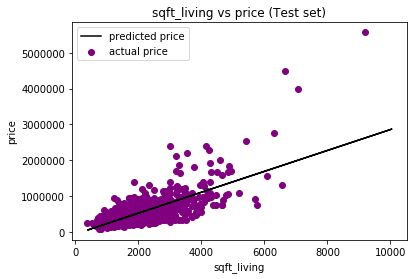

In [246]:
plt.scatter(x_test, y_test, color = 'purple',label ="actual price")
plt.plot(x_train, linreg.predict(x_train), color = 'black',label="predicted price")
plt.legend(loc='upper left')
plt.title('sqft_living vs price (Test set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()